In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib
%matplotlib inline

def get_csvfile_pd(url, cols = None):
    
    path = '../input/'
    name = url.rsplit('/', 1)[-1]
    csvfile = ''.join([path,name]) 
    hdffile = ''.join([path,name,'.h5'])            

    if not os.path.exists(csvfile) and not os.path.exists(hdffile):
        urllib.urlretrieve(url, csvfile)
    
    if os.path.exists(csvfile) and not os.path.exists(hdffile):
        df = pd.read_csv(csvfile, sep='\t', usecols=cols, error_bad_lines=False)
        df.to_hdf(hdffile,'openfood')
        #os.remove(csvfile)
        return df
    
    if os.path.exists(hdffile):
        return pd.read_hdf(hdffile)#, columns=colselection)
    
    raise Exception('Could find the data in specified location!')

In [2]:
#selecting columns
colselection = ['product_name', 'quantity', 'packaging', 'main_category_en',
                'energy_100g', 'fat_100g','carbohydrates_100g',
                'sugars_100g', 'fiber_100g', 'proteins_100g']

openfoodurl = 'http://world.openfoodfacts.org/data/en.openfoodfacts.org.products.csv'

food = get_csvfile_pd(url=openfoodurl, cols=colselection)

In [3]:
food.head(-5)

,product_name,quantity,packaging,main_category_en,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g
0,Farine de blé noir,1kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,NaN,2243.0,28.57,64.29,14.29,3.6,3.57
2,Peanuts,NaN,NaN,NaN,1941.0,17.86,60.71,17.86,7.1,17.86
3,Organic Salted Nut Mix,NaN,NaN,NaN,2540.0,57.14,17.86,3.57,7.1,17.86
4,Organic Polenta,NaN,NaN,NaN,1552.0,1.43,77.14,NaN,5.7,8.57
5,Breadshop Honey Gone Nuts Granola,NaN,NaN,NaN,1933.0,18.27,63.46,11.54,7.7,13.46
6,Organic Long Grain White Rice,NaN,NaN,NaN,1490.0,NaN,80.00,NaN,NaN,8.89
7,Organic Muesli,NaN,NaN,NaN,1833.0,18.75,57.81,15.62,9.4,14.06
8,Organic Dark Chocolate Minis,NaN,NaN,NaN,2406.0,37.50,55.00,42.50,7.5,5.00
9,Organic Sunflower Oil,NaN,NaN,NaN,3586.0,100.00,NaN,NaN,NaN,NaN


In [6]:
food['main_category_en'].value_counts()

Plant-based foods and beverages    21739
Beverages                          12512
Sugary snacks                      12016
Dairies                             7484
Groceries                           6174
Meats                               5078
Fresh foods                         3522
Meals                               2814
Fruit juices                        2285
Salty snacks                        2242
Spreads                             2193
Canned foods                        1850
Frozen foods                        1641
Seafood                             1606
Desserts                            1296
Sandwiches                           700
Sweeteners                           593
Baby foods                           546
Farming products                     536
Fats                                 498
Fruit juices and nectars             411
Breakfasts                           357
Dried products                       319
Dietary supplements                  315
Vinegars        

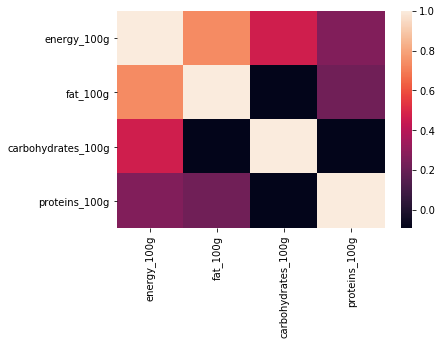

In [12]:
# Calculate correlations
corr =food[['energy_100g', 'fat_100g','carbohydrates_100g','proteins_100g']].dropna().corr()
 
# Heatmap
sns.heatmap(corr)